#**Stacking - AdaBoost(Regression)**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing  # Load California housing dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Code**

In [2]:
# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def fit_and_evaluate_ada_boost(base_estimator, X_train, y_train, X_test, y_test):
    # Create and fit the AdaBoost model
    ada_boost = AdaBoostRegressor(estimator=base_estimator, n_estimators=50, random_state=42)
    ada_boost.fit(X_train, y_train)

    # Make predictions on X_test
    predictions = ada_boost.predict(X_test)

    # Calculate Mean Squared Error and R² Score
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return ada_boost, mse, r2, predictions  # Return four values

In [5]:
# Collect results for plotting
results = []

# List of different base estimators to use with AdaBoost
base_estimators = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Shallow Decision Tree", DecisionTreeRegressor(max_depth=3)),
    ("Random Forest", RandomForestRegressor(n_estimators=10, max_depth=3)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=10, max_depth=3))
]


In [6]:
# Evaluate each base estimator
for name, estimator in base_estimators:
    ada_boost_model, mse, r2, predictions = fit_and_evaluate_ada_boost(estimator, X_train, y_train, X_test, y_test)
    results.append((name, mse, r2))

    print(f"{name} Predictions: {predictions}")
    print(f"{name} Mean Squared Error: {mse:.2f}, R² Score: {r2:.2f}")

Linear Regression Predictions: [0.82349488 1.92216046 2.76277181 ... 4.40279901 1.25911732 2.12287171]
Linear Regression Mean Squared Error: 0.56, R² Score: 0.57
Ridge Regression Predictions: [0.84702592 1.92810404 2.73096499 ... 4.37748682 1.2755977  2.1298925 ]
Ridge Regression Mean Squared Error: 0.56, R² Score: 0.57
Shallow Decision Tree Predictions: [1.50521865 1.66722178 3.19108072 ... 3.6206713  1.6876384  2.44308546]
Shallow Decision Tree Mean Squared Error: 0.61, R² Score: 0.53
Random Forest Predictions: [1.54467116 1.57012422 2.97737178 ... 3.68831455 1.67328551 2.16728553]
Random Forest Mean Squared Error: 0.59, R² Score: 0.55
Gradient Boosting Predictions: [1.71208901 1.74762133 3.23398879 ... 3.71379108 1.85925501 2.15644237]
Gradient Boosting Mean Squared Error: 0.68, R² Score: 0.48


In [7]:
# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Mean Squared Error', 'R² Score'])
results_df.head()

,Model,Mean Squared Error,R² Score
0,Linear Regression,0.561972,0.571148
1,Ridge Regression,0.564751,0.569027
2,Shallow Decision Tree,0.614478,0.531079
3,Random Forest,0.585009,0.553567
4,Gradient Boosting,0.681907,0.479623


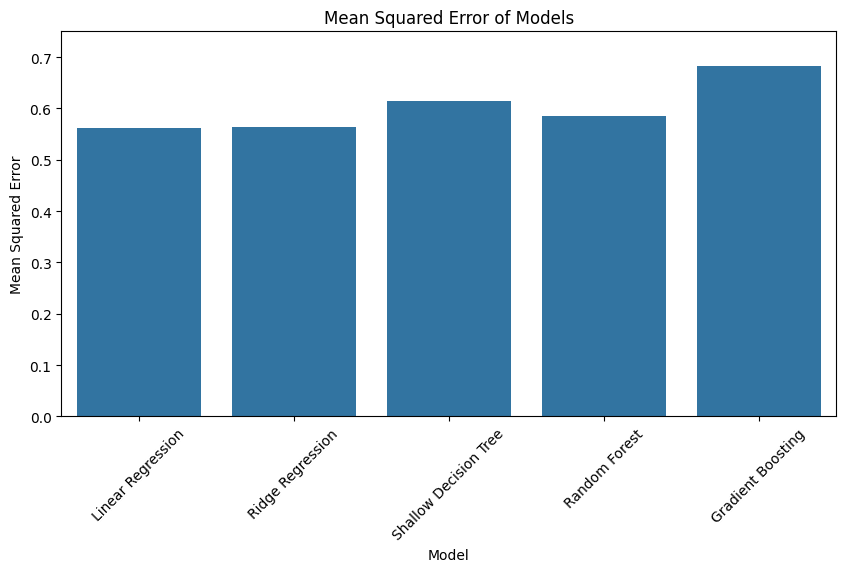

In [8]:
# Plot Mean Squared Error of each model
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Mean Squared Error', data=results_df)
plt.xticks(rotation=45)
plt.title('Mean Squared Error of Models')
plt.ylim(0, results_df['Mean Squared Error'].max() * 1.1)  # Set y-axis limits
plt.show()

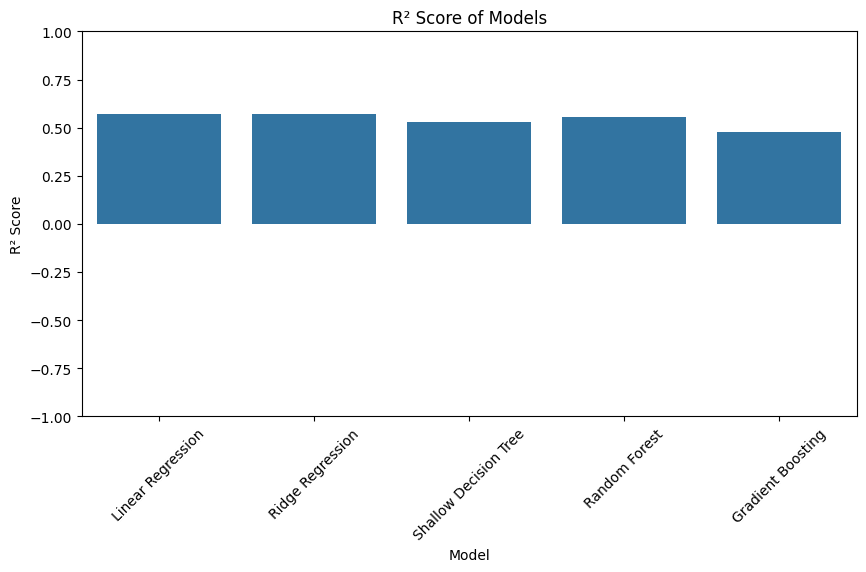

In [9]:
# Plot R² Score of each model
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R² Score', data=results_df)
plt.xticks(rotation=45)
plt.title('R² Score of Models')
plt.ylim(-1, 1)  # Set y-axis limits for R² Score
plt.show()